In [35]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

t_max=0
t_start=0

def read_bin(filename,N):
	with open(filename, 'rb') as f:
		data = np.fromfile(f, dtype=np.int32)

	data = data.reshape((N, N))
	return data

def segment_time(t_0,t_max):
	bins= np.arange(0,t_max+1,t_0)
	segments = []
	for i in range(len(bins)):
		segments.append(bins[i:i+2])
	return segments[:-1]


def make_animation2(data,time_region,skip=1,folder='segmentos/'):

	fig, ax = plt.subplots()
	cax = ax.imshow(data[0], interpolation='nearest')
	cax.set_clim(0,4)
	fig.colorbar(cax)
	fig.set_dpi(200)
	start=time_region[0]
	end=time_region[1]
	print(start,end)
	plt.subplots_adjust(left=0.1, right=0.9, bottom=0.1, top=0.9)

	def init():
		cax.set_data(data[0])
		ax.set_xticks([])
		ax.set_yticks([])
		return [cax]

	def update(i):
		print(i)
		cax.set_data(data[i])
		cax.set_cmap('inferno')
		cax.set_clim(0,4)
		ax.set_xticks([])
		ax.set_yticks([])
		ax.set_title('t = '+str(i+start+t_start))
		return [cax]

	ani = animation.FuncAnimation(fig, update, frames=range(0, len(data), skip), init_func=init, blit=True,interval=3)
	ani.save(folder+'animation_secuencial'+str(start)+"_"+str(end)+'.gif', fps=30)
	plt.close(fig)

	


In [21]:
config=np.genfromtxt('datos3/config.csv', delimiter=',', skip_header=0)
N=int(config[0])
t_max=int(config[1])
t_start=int(config[2])
print(N,t_max,t_start)

220 200000 100000


In [23]:
#load csv files
data_folder='datos3'
config=np.genfromtxt(data_folder+'/config.csv', delimiter=',', skip_header=0)
N=int(config[0])
t_max=int(config[1])

data=[]
t_start=190000
total_time=t_max-t_start
for i in range(t_start,t_max):
	data.append(
		read_bin(data_folder+'/datos'+str(i)+'.bin',N)
		)
	


print(len(data),total_time)

10000 10000


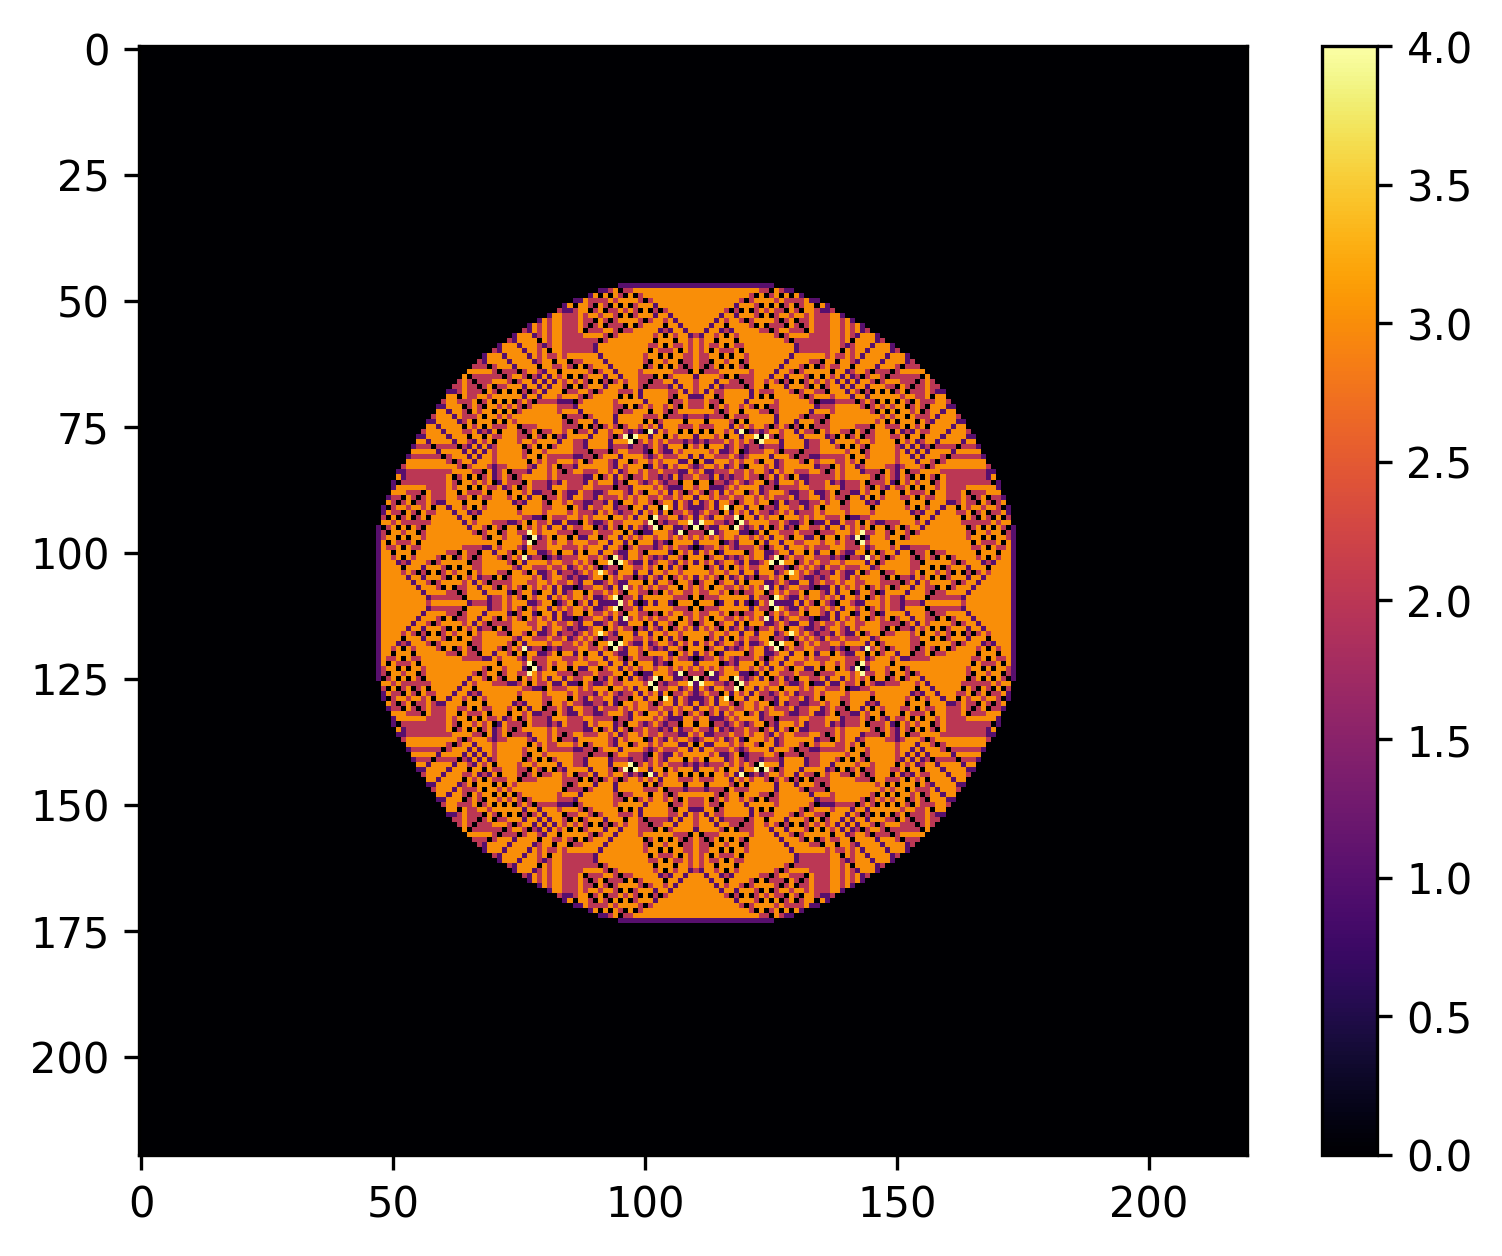

In [24]:

	

plt.figure(dpi=300)
plt.imshow(data[total_time-1],interpolation='nearest',cmap='inferno')
plt.clim(0,4)
plt.colorbar()


In [29]:
segments = segment_time(100,t_max-t_start)
data_segmented = []
for i in range(len(segments)):
	data_segmented.append(
		data[segments[i][0]:segments[i][1]]
		)





	


[   0 1000]


KeyboardInterrupt: 

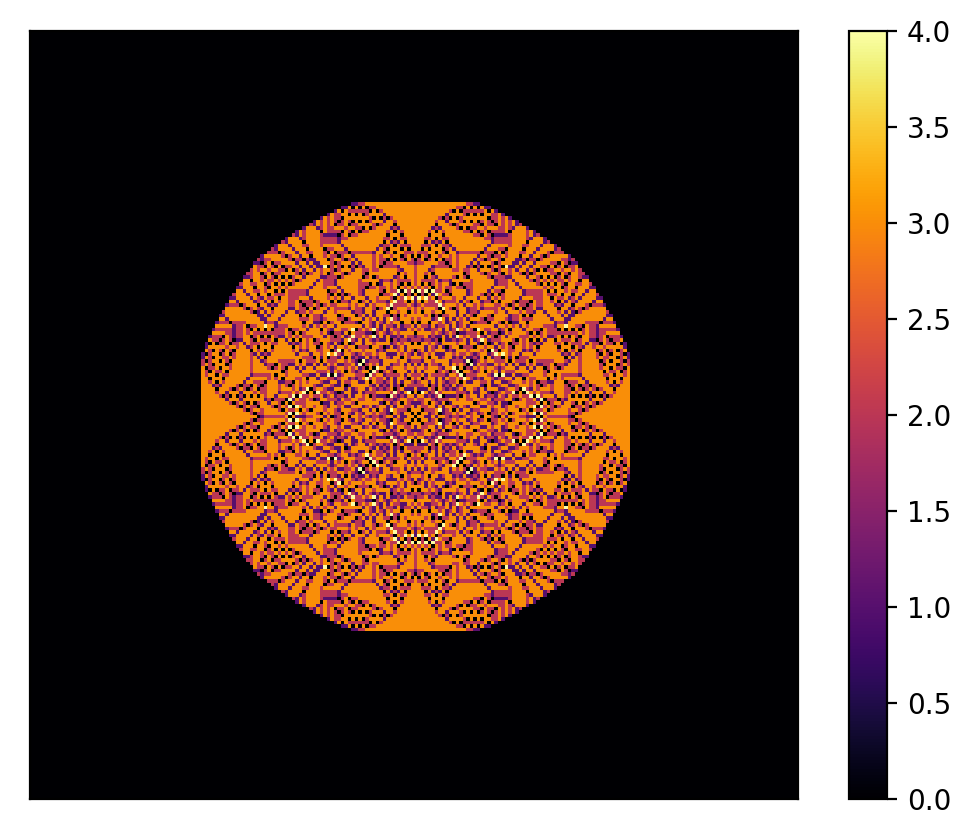

In [16]:
for i in range(len(data_segmented)):
	data_segment= data_segmented[i]
	time_region = segments[i]

	print(time_region)

	make_animation2(data_segment,time_region,10,'segmentos3/')


In [36]:
last= len(data_segmented)-1
make_animation2(data_segmented[-1],segments[-1],1,'')

9900 10000
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99


In [26]:
segments[-1]

array([ 9900, 10000])